Project:- COVID-19 INFECTION CLASSIFICATION WITH MACHINE LEARNING

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 
(SARS-CoV-2).

Initially prompt and accurate molecular diagnosis of COVID-19 was very challenging.

This Model helps to predict whether the patient will be Covid Positive or Negitive.

The steps followed in this notebook are:

1. DataLoading & Analysis
2. Data Visualizations
3. Data Preprocessing
4. Splitting the Data
5. Model Training
6. Comparing Model Results
7. Conclusion

In [1]:
#importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import sweetviz as sv
%matplotlib inline

1. DataLoading & Analysis

In [2]:
#Loading data into dataframe
df = pd.read_csv(r'C:\Users\madhuyen\Desktop\covid-desk2.csv')

In [3]:
#shape of dataframe
df.shape

(20352, 23)

In [4]:
#print top 3 rows
df.head(3)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0b69dc,1,2,29-05-2020,21-05-2020,9999-99-99,2,2,31,1,...,2,2,2,2,1,2,2,2,1,2
1,16d202,1,2,6/6/2020,30-05-2020,9999-99-99,2,2,26,1,...,2,1,2,2,1,2,2,2,1,2
2,0d32e0,1,2,3/5/2020,28-04-2020,9999-99-99,2,1,18,1,...,2,2,2,2,1,2,2,2,1,2


In [5]:
#List all the columns in the dataframe
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [6]:
#Drop id and date columns then print df shape
df=df.drop(columns=['id','entry_date','date_symptoms','date_died'])
df.shape

(20352, 19)

In [7]:
#show top 3 rows after dropping few columns
df.head(3)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,2,2,2,31,1,2,2,2,2,2,2,2,1,2,2,2,1,2
1,1,2,2,2,26,1,2,2,2,2,1,2,2,1,2,2,2,1,2
2,1,2,2,1,18,1,2,2,2,2,2,2,2,1,2,2,2,1,2


In [8]:
#Each column datatype
df.dtypes

sex                    int64
patient_type           int64
intubed                int64
pneumonia              int64
age                    int64
pregnancy              int64
diabetes               int64
copd                   int64
asthma                 int64
inmsupr                int64
hypertension           int64
other_disease          int64
cardiovascular         int64
obesity                int64
renal_chronic          int64
tobacco                int64
contact_other_covid    int64
covid_res              int64
icu                    int64
dtype: object

In [12]:
#val_columns = ['sex','patient_type','intubed','pneumonia','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid','icu','covid_res']
val_columns = ['sex','intubed','contact_other_covid','icu','covid_res']
for col in val_columns:
    print(df[col].value_counts())

1    20352
Name: sex, dtype: int64
2    18018
1     2334
Name: intubed, dtype: int64
2    14174
1     6178
Name: contact_other_covid, dtype: int64
2    17961
1     2391
Name: icu, dtype: int64
1    11905
2     8447
Name: covid_res, dtype: int64


In [11]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,20352.0,20352.0,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.00000,20352.000000,20352.000000,20352.000000,20352.000000
mean,1.0,2.0,1.885318,1.338886,50.458137,1.975138,1.705582,1.952241,1.965949,1.958382,1.672514,1.953862,1.945067,1.760957,1.95116,1.955041,1.696443,1.415045,1.882518
std,0.0,0.0,0.318645,0.473343,20.768518,0.155710,0.455792,0.213262,0.181364,0.199718,0.469308,0.209789,0.227855,0.426509,0.21554,0.207219,0.459805,0.492742,0.322002
min,1.0,2.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.0,2.0,2.000000,1.000000,37.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,1.000000,2.000000
50%,1.0,2.0,2.000000,1.000000,52.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,2.000000
75%,1.0,2.0,2.000000,2.000000,65.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000
max,1.0,2.0,2.000000,2.000000,115.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000


For all columns represents “1” for yes, “2” for no, “97” “98” “99” means not specified.
For covid_res: 1 indicates person is covid +ve,2 indicates person is covide -ve,3 indicates result is in awaiting process

2. Data Visualizations

In [9]:
#Data Visualization using Sweet Viz library
data_report = sv.analyze(df)

In [10]:
#data_Report html will be opened in a new tab
data_report.show_html("data_Report.html")

Report data_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'patient_type'}>,
        <AxesSubplot:title={'center':'intubed'}>,
        <AxesSubplot:title={'center':'pneumonia'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'pregnancy'}>,
        <AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'copd'}>],
       [<AxesSubplot:title={'center':'asthma'}>,
        <AxesSubplot:title={'center':'inmsupr'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'other_disease'}>],
       [<AxesSubplot:title={'center':'cardiovascular'}>,
        <AxesSubplot:title={'center':'obesity'}>,
        <AxesSubplot:title={'center':'renal_chronic'}>,
        <AxesSubplot:title={'center':'tobacco'}>],
       [<AxesSubplot:title={'center':'contact_other_covid'}>,
        <AxesSubplot:title={'center':'covid_res'}>,
        <AxesSubplot:title={'center':'icu'}>, <AxesSubplot:>

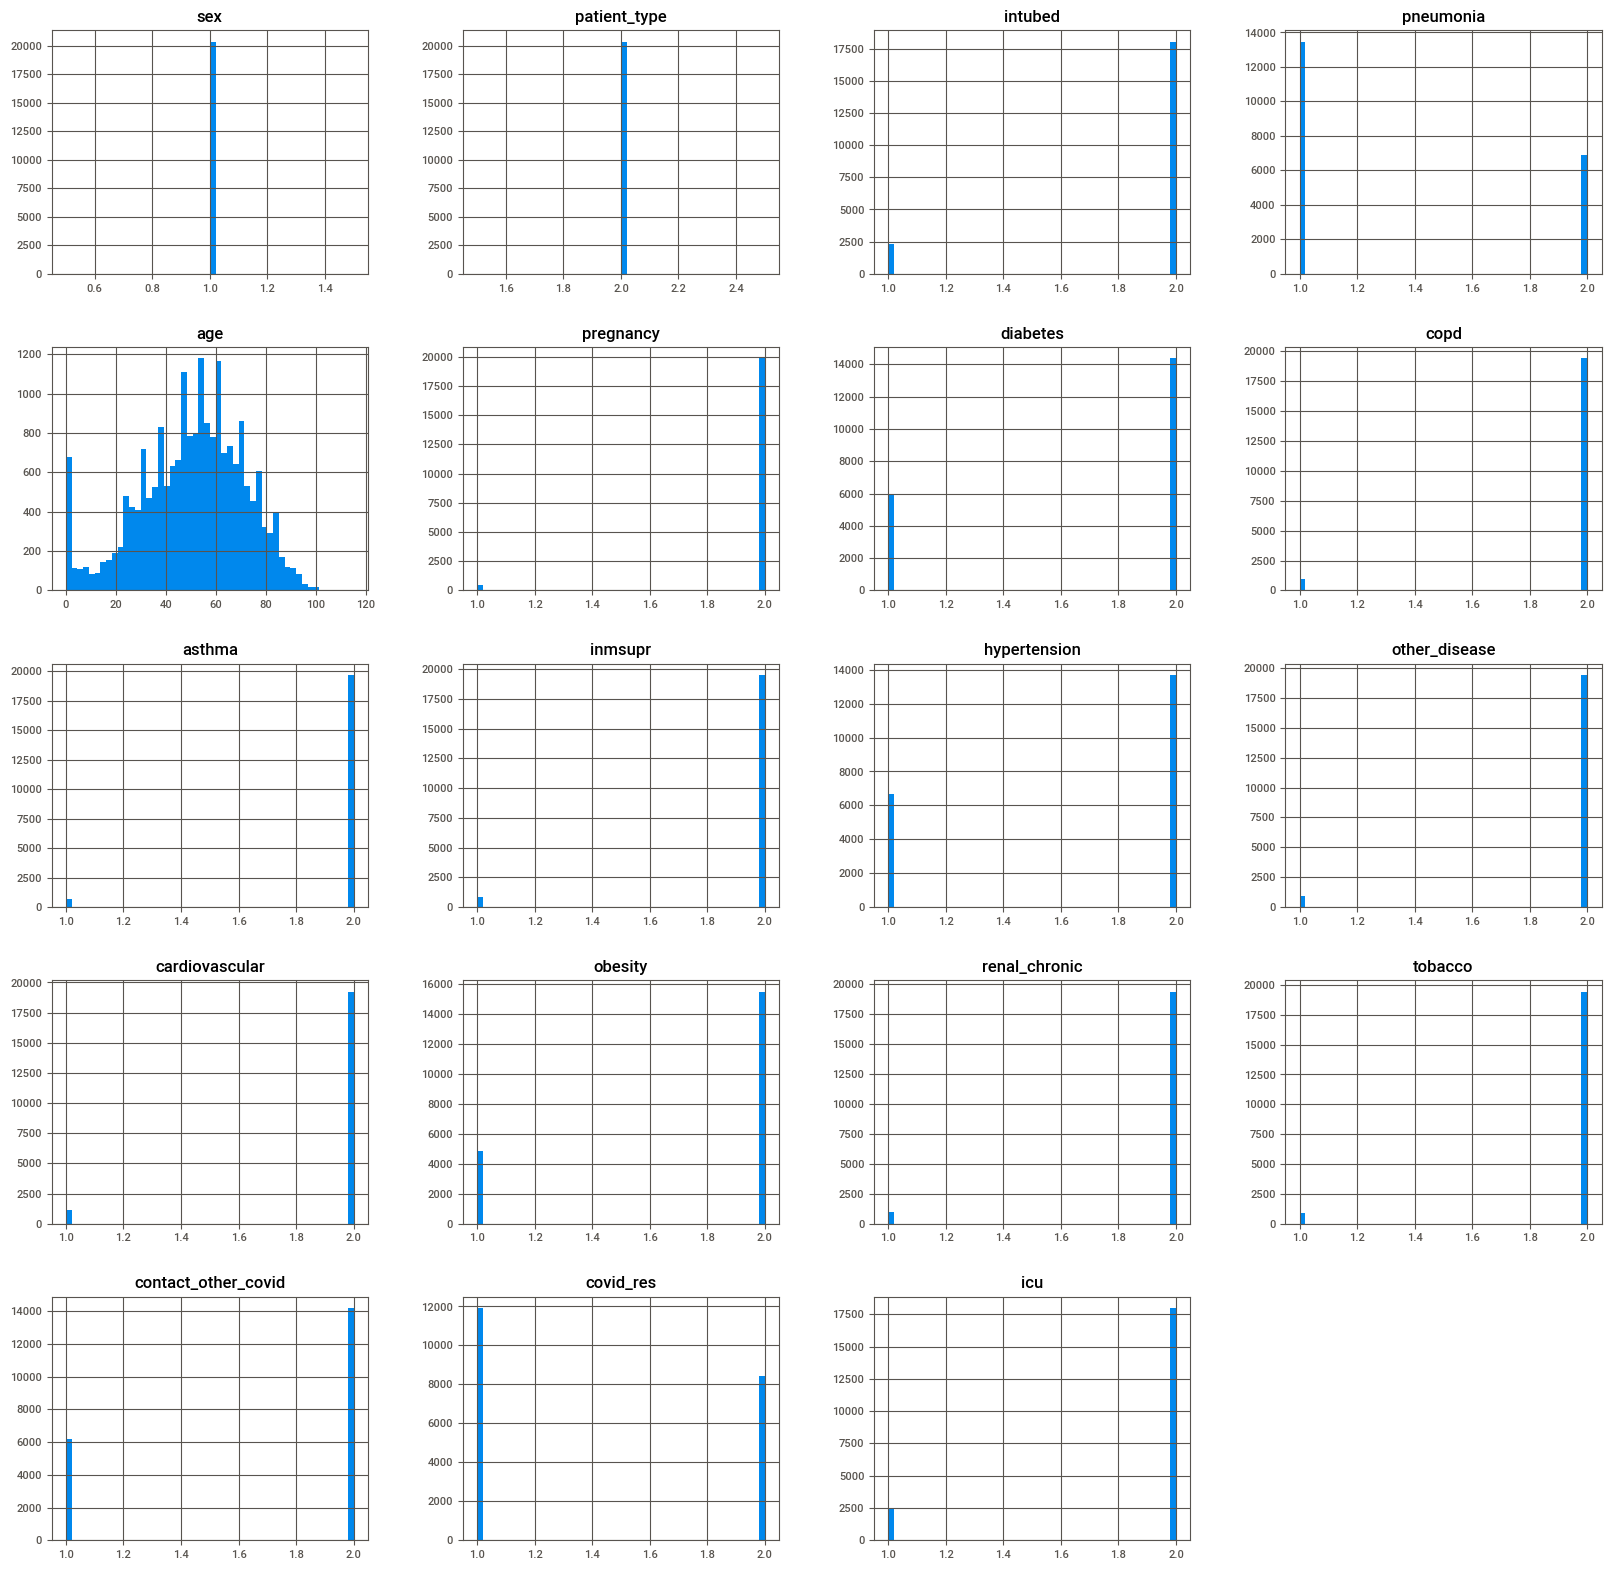

In [13]:
df.hist(bins = 50,figsize = (20,20))

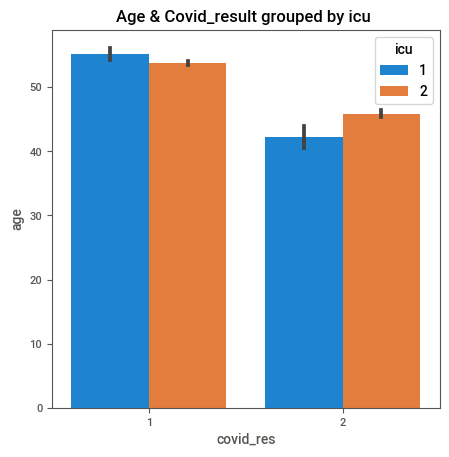

In [14]:
#Age & Covid_res Count grouped by icu bar plot
#ppl with covid result and icu with respect to Age

plt.figure(figsize=(5,5))
sns.barplot(y="age", x="covid_res", hue="icu", data=df)
plt.title('Age & Covid_result grouped by icu ')
plt.show()

C:\Users\madhuyen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\madhuyen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\madhuyen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\madhuyen\Anac

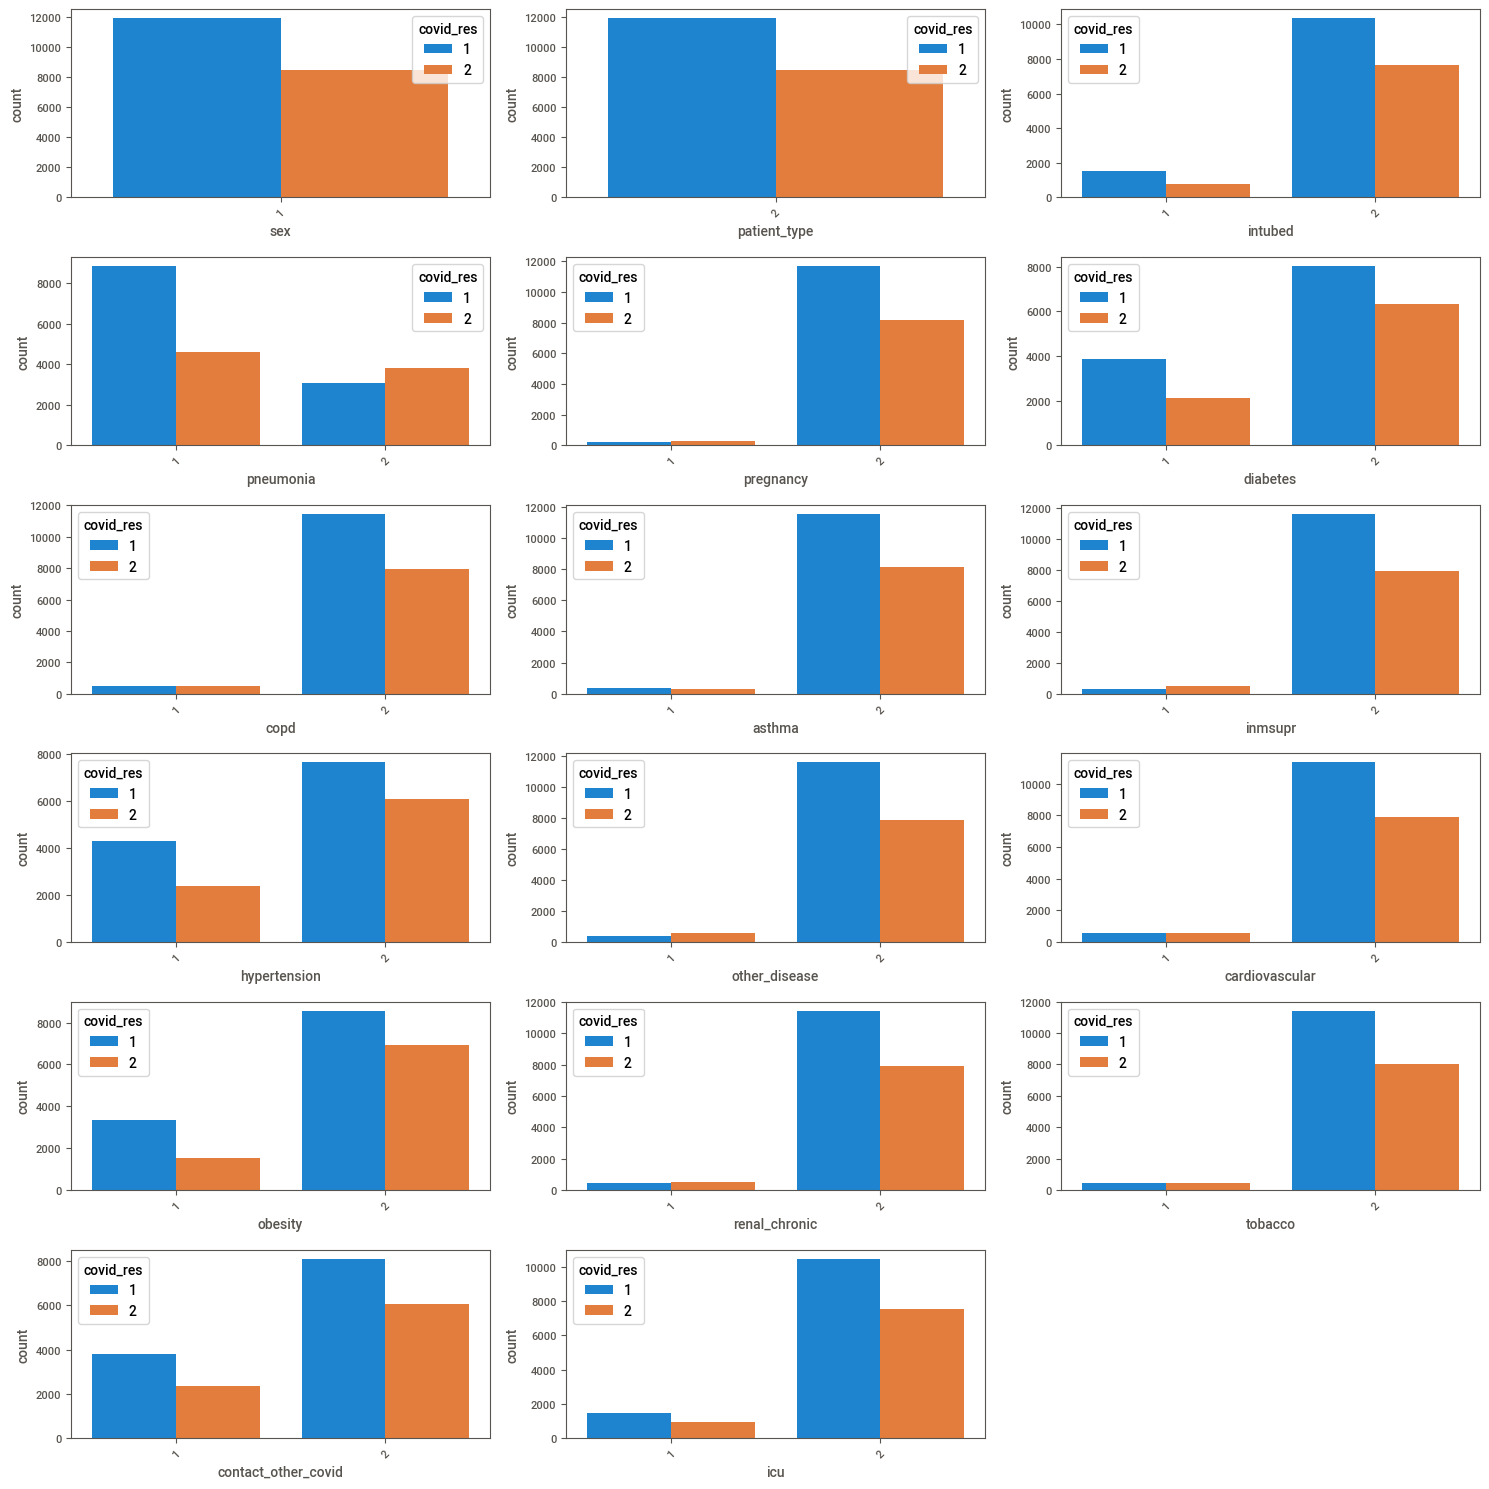

In [15]:
#Plot with all columns Count grouped by Covid_result bar plot
features = ['sex','patient_type','intubed','pneumonia','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid','icu']
plt.figure(figsize=(15,15))
for i in enumerate(features):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],hue='covid_res',data=df)
    plt.xticks(rotation=45,size=8)
    plt.tight_layout()

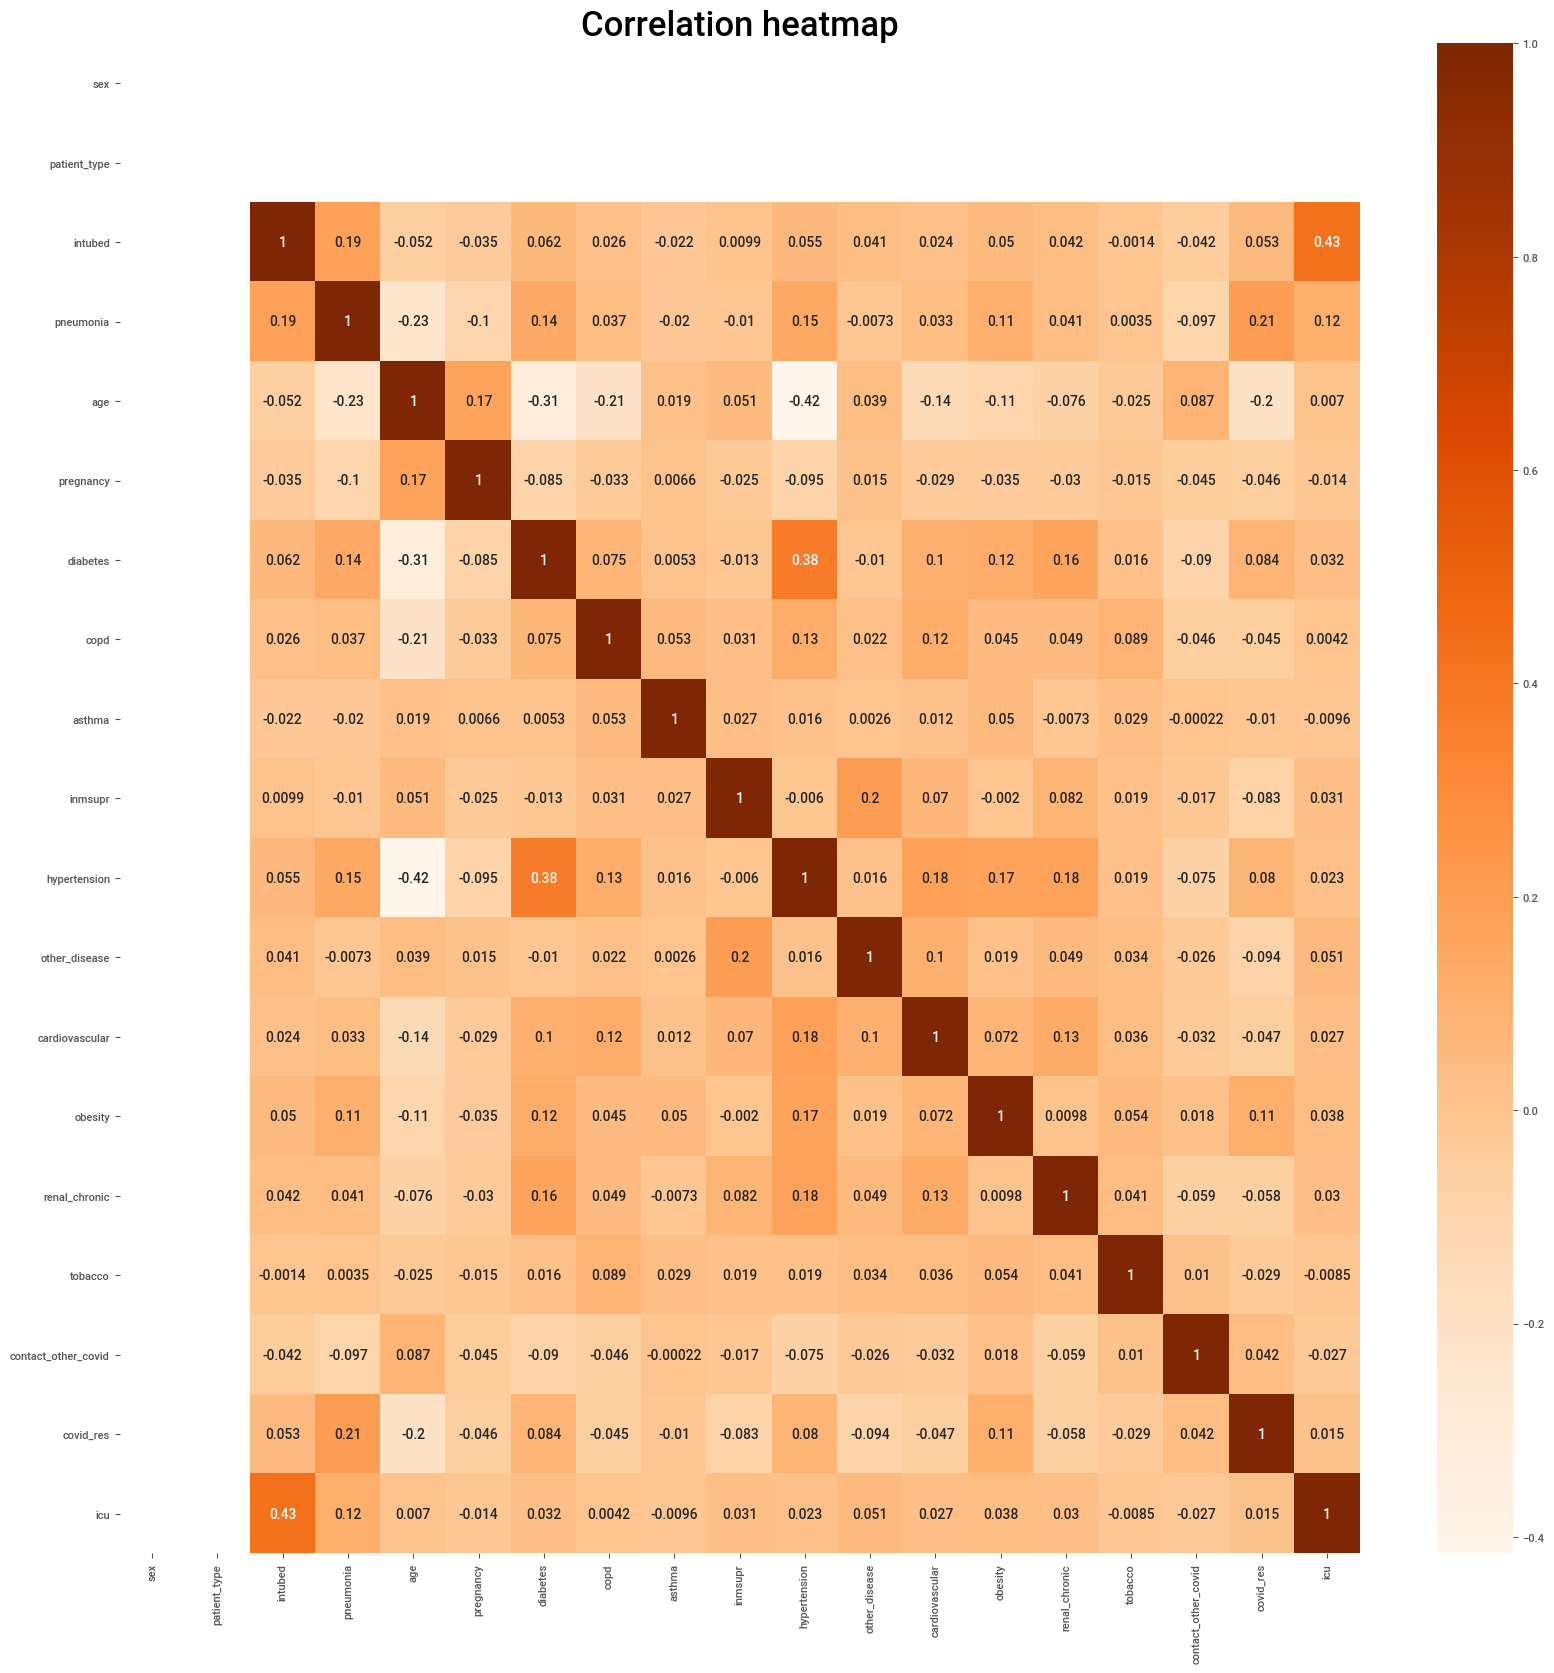

In [16]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')
plt.title('Correlation heatmap',size=25)
plt.show()

3. Data Preprocessing

In [17]:
#drop if any value is null
df.dropna()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,2,2,2,31,1,2,2,2,2,2,2,2,1,2,2,2,1,2
1,1,2,2,2,26,1,2,2,2,2,1,2,2,1,2,2,2,1,2
2,1,2,2,1,18,1,2,2,2,2,2,2,2,1,2,2,2,1,2
3,1,2,1,1,23,1,2,2,2,2,2,2,2,1,2,2,1,1,1
4,1,2,2,2,22,1,2,2,2,2,2,2,2,1,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20347,1,2,2,1,70,2,2,1,2,2,2,2,2,2,2,2,2,2,2
20348,1,2,2,1,36,2,2,1,2,2,1,2,2,2,1,1,2,2,2
20349,1,2,2,2,60,2,2,1,1,2,1,2,2,2,2,2,1,2,2
20350,1,2,2,2,93,2,2,1,2,2,1,2,2,2,2,2,2,2,2


In [18]:
#count null values in each column
df.isnull().sum()

sex                    0
patient_type           0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [19]:
# Apply our encoding logic even though we don't have any categorical data in df
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [20]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,20352.0,20352.0,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.00000,20352.000000,20352.000000,20352.000000,20352.000000
mean,1.0,2.0,1.885318,1.338886,50.458137,1.975138,1.705582,1.952241,1.965949,1.958382,1.672514,1.953862,1.945067,1.760957,1.95116,1.955041,1.696443,1.415045,1.882518
std,0.0,0.0,0.318645,0.473343,20.768518,0.155710,0.455792,0.213262,0.181364,0.199718,0.469308,0.209789,0.227855,0.426509,0.21554,0.207219,0.459805,0.492742,0.322002
min,1.0,2.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.0,2.0,2.000000,1.000000,37.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,1.000000,2.000000
50%,1.0,2.0,2.000000,1.000000,52.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,2.000000
75%,1.0,2.0,2.000000,2.000000,65.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000
max,1.0,2.0,2.000000,2.000000,115.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000


4. Splitting the Data

In [21]:
X = df.drop(columns=['covid_res'])
y = df[['covid_res']]

X.shape, y.shape

((20352, 18), (20352, 1))

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_df_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_df_scaled = scaler.fit_transform(X)

In [23]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x_df_scaled,y,test_size=0.2,random_state=0,stratify=y)
X_train.shape, X_test.shape

((16281, 18), (4071, 18))

In [24]:
# Creating lists to store the model performance results

from sklearn.metrics import mean_squared_error

ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results

def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

5. Model Building & Training:

Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.
              
There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under classification problem.

The below supervised machine learning models considered to train the dataset in this notebook are:

1. LogisticRegression
2. KNeighborsClassifier
3. DecisionTreeClassifier
4. RandomForestClassifier
5. GradientBoostingClassifier
6. BaggingClassifier

The metrics considered to evaluate the model performance are Accuracy & Root Mean Squared Error.

5.1 LogisticRegression:-
    

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
lrclf = model.fit(X_train,y_train.values.ravel())

#predicting the target value from the model for the samples
y_train_neighcls = lrclf.predict(X_train)
y_test_neighcls = lrclf.predict(X_test)

#computing the accuracy of the model performance
acc_train_lrclf = lrclf.score(X_train, y_train)
acc_test_lrclf = lrclf.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lrclf = np.sqrt(mean_squared_error(y_train, y_train_neighcls))
rmse_test_lrclf = np.sqrt(mean_squared_error(y_test, y_test_neighcls))

print('Accuracy of Training is %s & Testing is %s'%(acc_train_lrclf,acc_test_lrclf))
print('RMSE of Training is %s & Testing is %s'%(rmse_train_lrclf,rmse_test_lrclf))
#storing the results.
storeResults('LogisticRegression', acc_train_lrclf, acc_test_lrclf, rmse_train_lrclf, rmse_test_lrclf)

Accuracy of Training is 0.6626742829064554 & Testing is 0.6592974699091132
RMSE of Training is 0.5807974837183307 & Testing is 0.5836972932016105


5.2 KNeighborsClassifier:-
    

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=3)
neighcls=neigh.fit(X_train,y_train.values.ravel())

#predicting the target value from the model for the samples
y_train_neighcls = neighcls.predict(X_train)
y_test_neighcls = neighcls.predict(X_test)

#computing the accuracy of the model performance
acc_train_neighcls = neighcls.score(X_train, y_train)
acc_test_neighcls = neighcls.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_neighcls = np.sqrt(mean_squared_error(y_train, y_train_neighcls))
rmse_test_neighcls = np.sqrt(mean_squared_error(y_test, y_test_neighcls))

print('Accuracy of Training is %s & Testing is %s'%(acc_train_neighcls,acc_test_neighcls))
print('RMSE of Training is %s & Testing is %s'%(rmse_train_neighcls,rmse_test_neighcls))
#storing the results.
storeResults('KNeighborsClassifier', acc_train_neighcls, acc_test_neighcls, rmse_train_neighcls, rmse_test_neighcls)

Accuracy of Training is 0.714083901480253 & Testing is 0.6067305330385655
RMSE of Training is 0.5347112290944963 & Testing is 0.6271120051166574


5.3. DecisionTreeClassifier:-

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train.values.ravel())

#predicting the target value from the model for the samples
y_test_tree = dtree.predict(X_test)
y_train_tree = dtree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = dtree.score(X_train, y_train)
acc_test_tree = dtree.score(X_test, y_test)

print('Accuracy of Training is %s & Testing is %s'%(acc_train_tree,acc_test_tree))

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print('Accuracy of Training is %s & Testing is %s'%(acc_train_tree,acc_test_tree))
print('RMSE of Training is %s & Testing is %s'%(rmse_train_tree,rmse_test_tree))
#storing the results.
storeResults('DecisionTreeClassifier', acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

Accuracy of Training is 0.8043117744610282 & Testing is 0.6214689265536724
Accuracy of Training is 0.8043117744610282 & Testing is 0.6214689265536724
RMSE of Training is 0.4423666189248142 & Testing is 0.6152487898779873


5.4. RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

pred_df = pd.DataFrame(rf.predict(X_test), columns=['pred'])
pred_df['actual'] = y_test.values
pred_df['residual'] = (pred_df['pred'] - pred_df['actual']).abs()

#predicting the target value from the model for the samples
y_train_rf = rf.predict(X_train)
y_test_rf =rf.predict(X_test)

#computing the accuracy of the model performance
acc_train_rf = rf.score(X_train, y_train)
acc_test_rf = rf.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_rf))

print('Accuracy of Training is %s & Testing is %s'%(acc_train_rf,acc_test_rf))
print('RMSE of Training is %s & Testing is %s'%(rmse_train_rf,rmse_test_rf))

#storing the results.
storeResults('RandomForestClassifier', acc_train_rf, acc_test_rf, rmse_train_rf, rmse_test_rf)

<ipython-input-28-0e1264524c24>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy of Training is 0.8042503531724096 & Testing is 0.6195038074183248
RMSE of Training is 0.4424360369901964 & Testing is 0.6168437343295912


5.5. GradientBoostingClassifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(random_state=0)
clf_gb.fit(X_train,y_train.values.ravel())

#predicting the target value from the model for the samples
y_train_tree = clf_gb.predict(X_train)
y_test_tree = clf_gb.predict(X_test)

#computing the accuracy of the model performance
acc_train_gb = clf_gb.score(X_train, y_train)
acc_test_gb = clf_gb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_gb = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_test_tree))

print('Accuracy of Training is %s & Testing is %s'%(acc_train_gb,acc_test_gb))
print('RMSE of Training is %s & Testing is %s'%(rmse_train_gb,rmse_test_gb))

#storing the results.
storeResults('GradientBoostingClassifier', acc_train_gb, acc_test_gb, rmse_train_gb, rmse_test_gb)

Accuracy of Training is 0.6838032061912659 & Testing is 0.6725620240727094
RMSE of Training is 0.562313785896037 & Testing is 0.5722219638630542


5.6. BaggingClassifier:-

In [30]:
from sklearn.ensemble import BaggingClassifier

# Create a bag of estimators of size 11
dtree_bag = BaggingClassifier(base_estimator=dtree, n_estimators=100, random_state=555, n_jobs=-1)

dtree_bag.fit(X_train,y_train)

results = dtree_bag.score(X_test, y_test)

#predicting the target value from the model for the samples
y_train_dtree_bag = dtree_bag.predict(X_train)
y_test_dtree_bag = dtree_bag.predict(X_test)

#computing the accuracy of the model performance
dtree_bag_train_gb = dtree_bag.score(X_train, y_train)
dtree_bag_test_gb = dtree_bag.score(X_test, y_test)

#computing root mean squared error (RMSE)
dtree_rmse_train_gb = np.sqrt(mean_squared_error(y_train, y_train_dtree_bag))
dtree_rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_test_dtree_bag))

print('Accuracy of Training is %s & Testing is %s'%(dtree_bag_train_gb,dtree_bag_test_gb))
print('RMSE of Training is %s & Testing is %s'%(dtree_rmse_train_gb,dtree_rmse_test_gb))

#storing the results.
storeResults('BaggingClassifier', dtree_bag_train_gb, dtree_bag_test_gb, dtree_rmse_train_gb, dtree_rmse_test_gb)

C:\Users\madhuyen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of Training is 0.8043117744610282 & Testing is 0.6236796855809383
RMSE of Training is 0.4423666189248142 & Testing is 0.6134495206771798


6. Comparision of Models:

In [31]:
#comparing Results
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [32]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,LogisticRegression,0.663,0.659,0.581,0.584
1,KNeighborsClassifier,0.714,0.607,0.535,0.627
2,DecisionTreeClassifier,0.804,0.621,0.442,0.615
3,RandomForestClassifier,0.804,0.620,0.442,0.617
4,GradientBoostingClassifier,0.684,0.673,0.562,0.572
5,BaggingClassifier,0.804,0.624,0.442,0.613


PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

In [33]:
from pycaret.classification import *
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [34]:
clf = setup(data = df, target = 'covid_res', session_id=123, numeric_imputation = 'mean',categorical_imputation= 'mode')

,Description,Value
0,session_id,123
1,Target,covid_res
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(20352, 19)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [36]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6738,0.7007,0.4402,0.6627,0.5289,0.2947,0.3092,0.1760
gbc,Gradient Boosting Classifier,0.6737,0.7050,0.4471,0.6594,0.5328,0.2961,0.3093,0.3560
catboost,CatBoost Classifier,0.6714,0.6999,0.4677,0.6454,0.5422,0.2960,0.3055,19.1440
lightgbm,Light Gradient Boosting Machine,0.6706,0.6981,0.4729,0.6414,0.5443,0.2955,0.3040,0.2630
xgboost,Extreme Gradient Boosting,0.6643,0.6847,0.4677,0.6303,0.5369,0.2825,0.2903,1.0270
lda,Linear Discriminant Analysis,0.6638,0.6863,0.4561,0.6334,0.5301,0.2791,0.2883,0.0360
lr,Logistic Regression,0.6635,0.6863,0.4551,0.6332,0.5294,0.2783,0.2876,0.5330
ridge,Ridge Classifier,0.6634,0.0000,0.4534,0.6337,0.5284,0.2778,0.2873,0.0230
nb,Naive Bayes,0.6319,0.6687,0.3874,0.5878,0.4669,0.2036,0.2139,0.0210
et,Extra Trees Classifier,0.6262,0.6185,0.4606,0.5622,0.5063,0.2103,0.2131,0.5360


In [37]:
#show best model
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


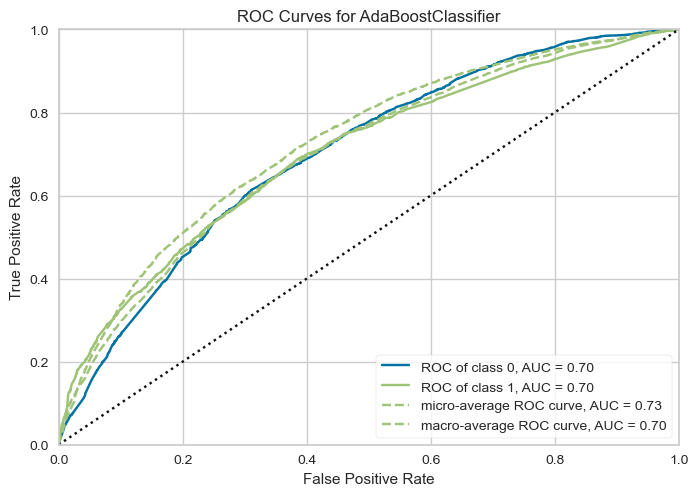

In [38]:
## creating a model
ada=create_model('ada')

#tune model
tuned_ada = tune_model(ada)
plot_model(tuned_ada)

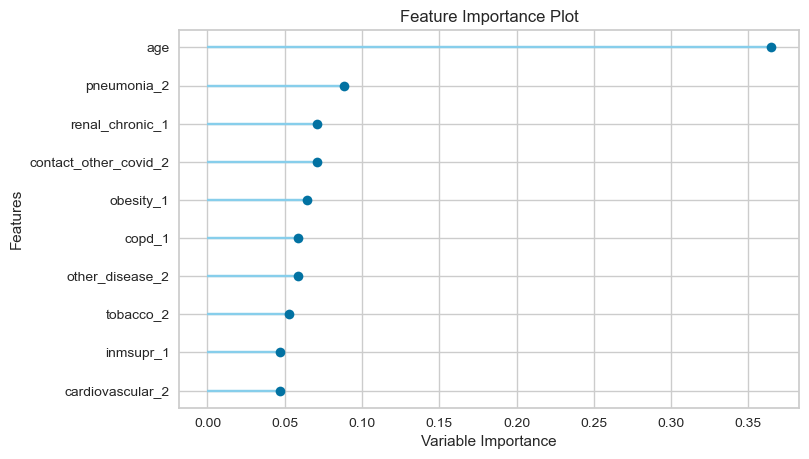

In [39]:
#plot feature importance
plot_model(tuned_ada, plot='feature')

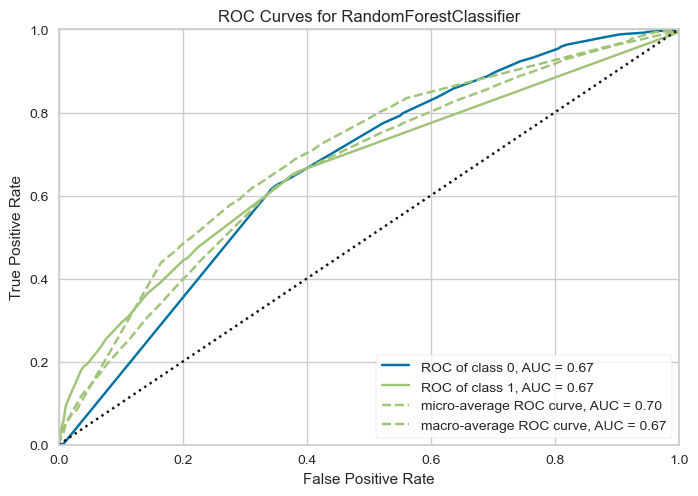

In [40]:
## creating a model https://pycaret.org/create-model/
rf=create_model('rf')

#tune model
tuned_rf = tune_model(rf)
plot_model(tuned_rf)


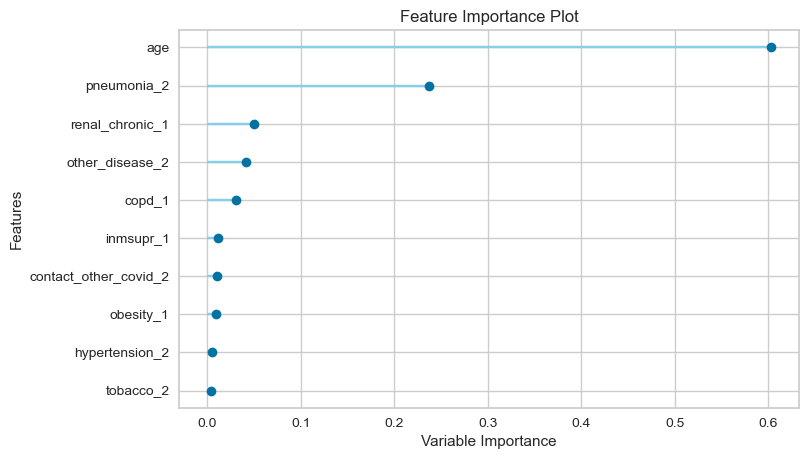

In [41]:
#plot feature importance
plot_model(tuned_rf, plot='feature')

7. Conclusion:-
Above models helps to classify whether the patient will be tested COVID Positive or Negative.

From above models comparing results, we can conclude that Random Forest classifier gives best training and testing accuracy compared to other models for the given dataset.
Using Pycaret we get automated output without explicitly running each model.
